In [1]:
from numpy import *; from matplotlib.pyplot import *;from scipy.constants import pi
import sys; sys.path.insert(0,'/home/noah/Desktop/large_analysis/ca_analysis/')
import predefined as pd
from numba import jit

In [2]:
@jit(nopython=True)
def s(t,B,w,trise,tfall,ttop,phi):
    l1=tfall/w*cos(w*t+phi)+sin(w*t+phi)/w**2.
    l2=-1.*(tfall+trise)/w*cos(w*(t-trise)+phi)-sin(w*(t-trise)+phi)/w**2.
    l3=trise/w*(cos(w*(t-trise)+phi)-cos(w*(t-trise-ttop)+phi))
    l4=(trise-tfall)/w*cos(w*(t-trise-ttop)+phi)-sin(w*(t-trise-ttop)+phi)/w**2.
    l5=tfall/w*cos(w*(t-2*trise-ttop)+phi)-sin(w*(t-2*trise-ttop)+phi)
    return -B/(trise*tfall)*(l1+l2+l3+l4+l5)

s(0,1,1,1,1,1,1)

-1.1760925598943324

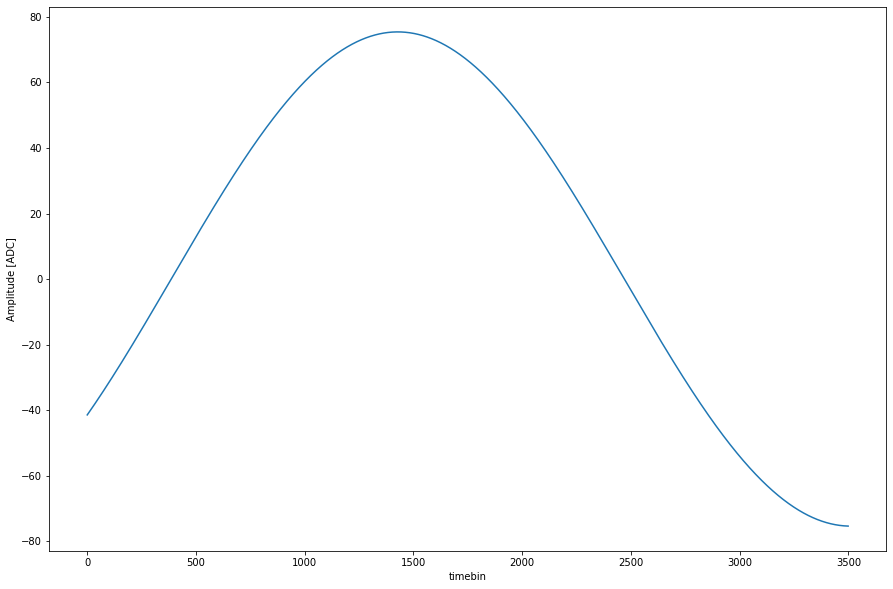

In [3]:
t=np.arange(3500)
# phi=np.linspace(0,3.14159,1000)
phi=0
w=2*pi*60e3*4e-9
fig,ax=subplots(figsize=(15,10))
ax.plot(t,s(t,50,w,300,1100,100,phi=0))
ax.set_xlabel('timebin')
ax.set_ylabel('Amplitude [ADC]')
show()

In [4]:
t=np.arange(3500)
w=2*3.14159*60e3*4e-9
smax=0
smin=0
for phi in linspace(0,pi,500):
    osc=s(t,50,w,300,1100,100,phi)
    if amax(osc)>smax:
        smax=amax(osc)
    if amin(osc)<smin:
        smin=amin(osc)
print(smax,smin)

75.4309208790689 -75.43092087855823


In [5]:
t=np.arange(3500)
w=2*pi*60e3*4e-9
rise,top,fall=300,100,1100
phis=2*pi*random.random_sample(size=1000000)

@jit(nopython=True)
def ret_vals(phi):
    vals=np.zeros(len(phi))
    for i in range(len(phi)):
        vals[i]=s(t,50,w,trise=rise,tfall=fall,ttop=top,phi=phi[i])[1350]
    return vals
vals=ret_vals(np.zeros(2))
vals=ret_vals(phis)
        

# for i,phi in enumerate(phis):
#     vals[i]=s(t,50,w,trise=rise,tfall=fall,ttop=top,phi=phi)[1350]


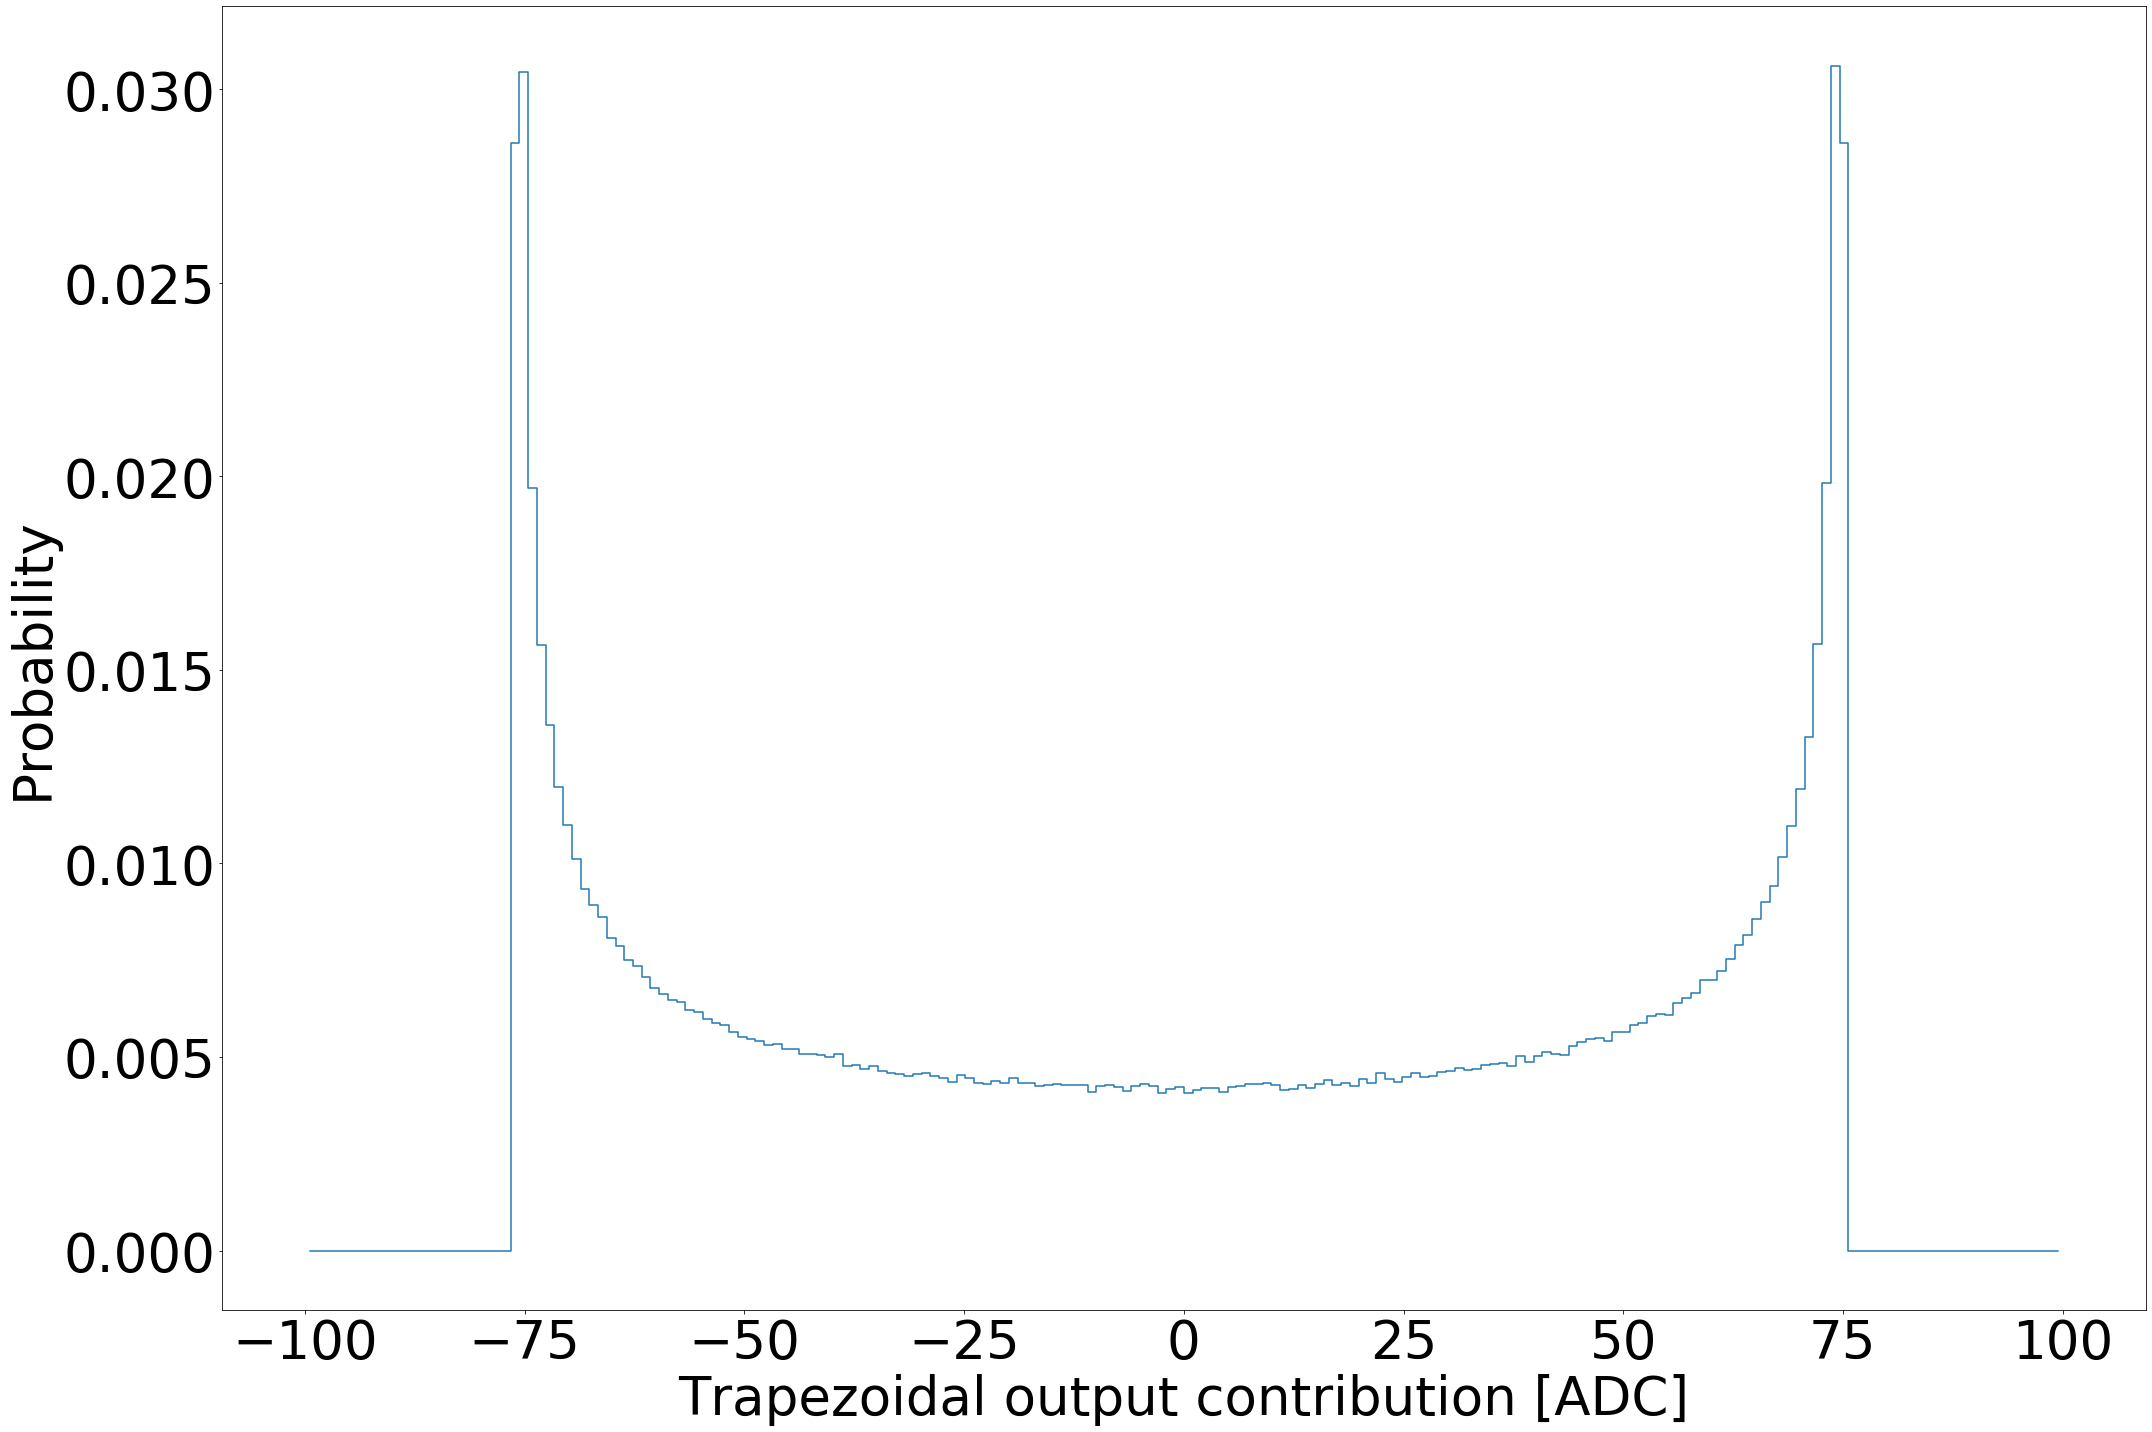

In [10]:
fs=53
fig,ax=subplots(figsize=(30,20))
hist,bins=np.histogram(vals,bins=201,range=[-100,100])
bins=pd.cbins(bins)
hist=hist.astype(float)/np.sum(hist)
ax.plot(bins,hist,ds='steps')
ax.set_xlabel('Trapezoidal output contribution [ADC]',fontsize=fs)
ax.set_ylabel('Probability',fontsize=fs)
ax.tick_params(labelsize=fs)
fig.tight_layout()
savefig('/home/noah/Desktop/phd/ut-thesis/figures/pdf/osc_contribution.pdf',format='pdf')
# ax.set_ylabel('Trap contribution [ADC]')
show()

In [17]:
norm=np.sum(hist)
size=int(1e6)
print(bins[1]-bins[0])
samp_ADC=np.random.choice(bins,size=size,p=hist.astype(float)/norm)+(bins[1]-bins[0])*(np.random.random_sample(size))-1
# np.save('osc_sampling',samp_ADC)

0.9950248756219082


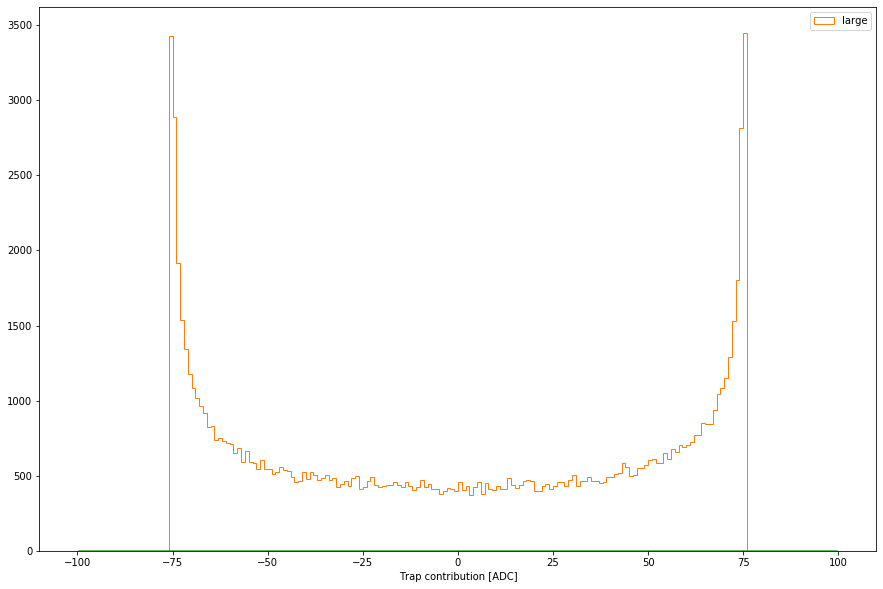

In [25]:
test=np.load('vals-1e6.npy')
fig,ax=subplots(figsize=(15,10))
ax.hist(samp_ADC,bins=200,range=[-100,100],histtype='step',density=True)
ax.hist(vals,bins=200,range=[-100,100],histtype='step',density=False,label='large')
ax.plot(bins,hist.astype(float)/np.sum(hist),ds='steps')
ax.set_xlabel('Trap contribution [ADC]')
# ax.set_ylabel('Trap contribution [ADC]')
legend()
show()